In [1]:
cd /data/trungnv/Object_Detection/YOLOv5/

/data/trungnv/Object_Detection/YOLOv5


In [2]:
import torch
import os
from yolov5 import utils


In [3]:
os.environ['CUDA_VISIBLE_DEVICES']='0'
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2022-07-22 15:08:09.106906: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
cd yolov5/

/data/trungnv/Object_Detection/YOLOv5/yolov5


In [5]:
display = utils.notebook_init()

YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)


Setup complete ✅ (48 CPUs, 125.6 GB RAM, 316.6/372.2 GB disk)


In [7]:
# Train YOLOv5
!python train.py --img 640 --batch 64 --epochs 200 --data custom_data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 50 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

In [14]:
%%time

!python detect.py --weights /data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp23/weights/best.pt \
--img 960 --conf 0.25 --source data/images/bmw-840i-2-3592.jpg

detect: weights=['/data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp23/weights/best.pt'], source=data/images/bmw-840i-2-3592.jpg, data=data/coco128.yaml, imgsz=[960, 960], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 213 layers, 7584586 parameters, 0 gradients, 17.6 GFLOPs
image 1/1 /data/trungnv/Object_Detection/YOLOv5/yolov5/data/images/bmw-840i-2-3592.jpg: 736x960 1 BMW, Done. (0.015s)
Speed: 0.8ms pre-process, 15.3ms inference, 1.7ms NMS per image at shape (1, 3, 960, 960)
Results saved to runs/detect/exp16
CPU times: user 166 ms, sys: 64.5 ms, total: 231 m

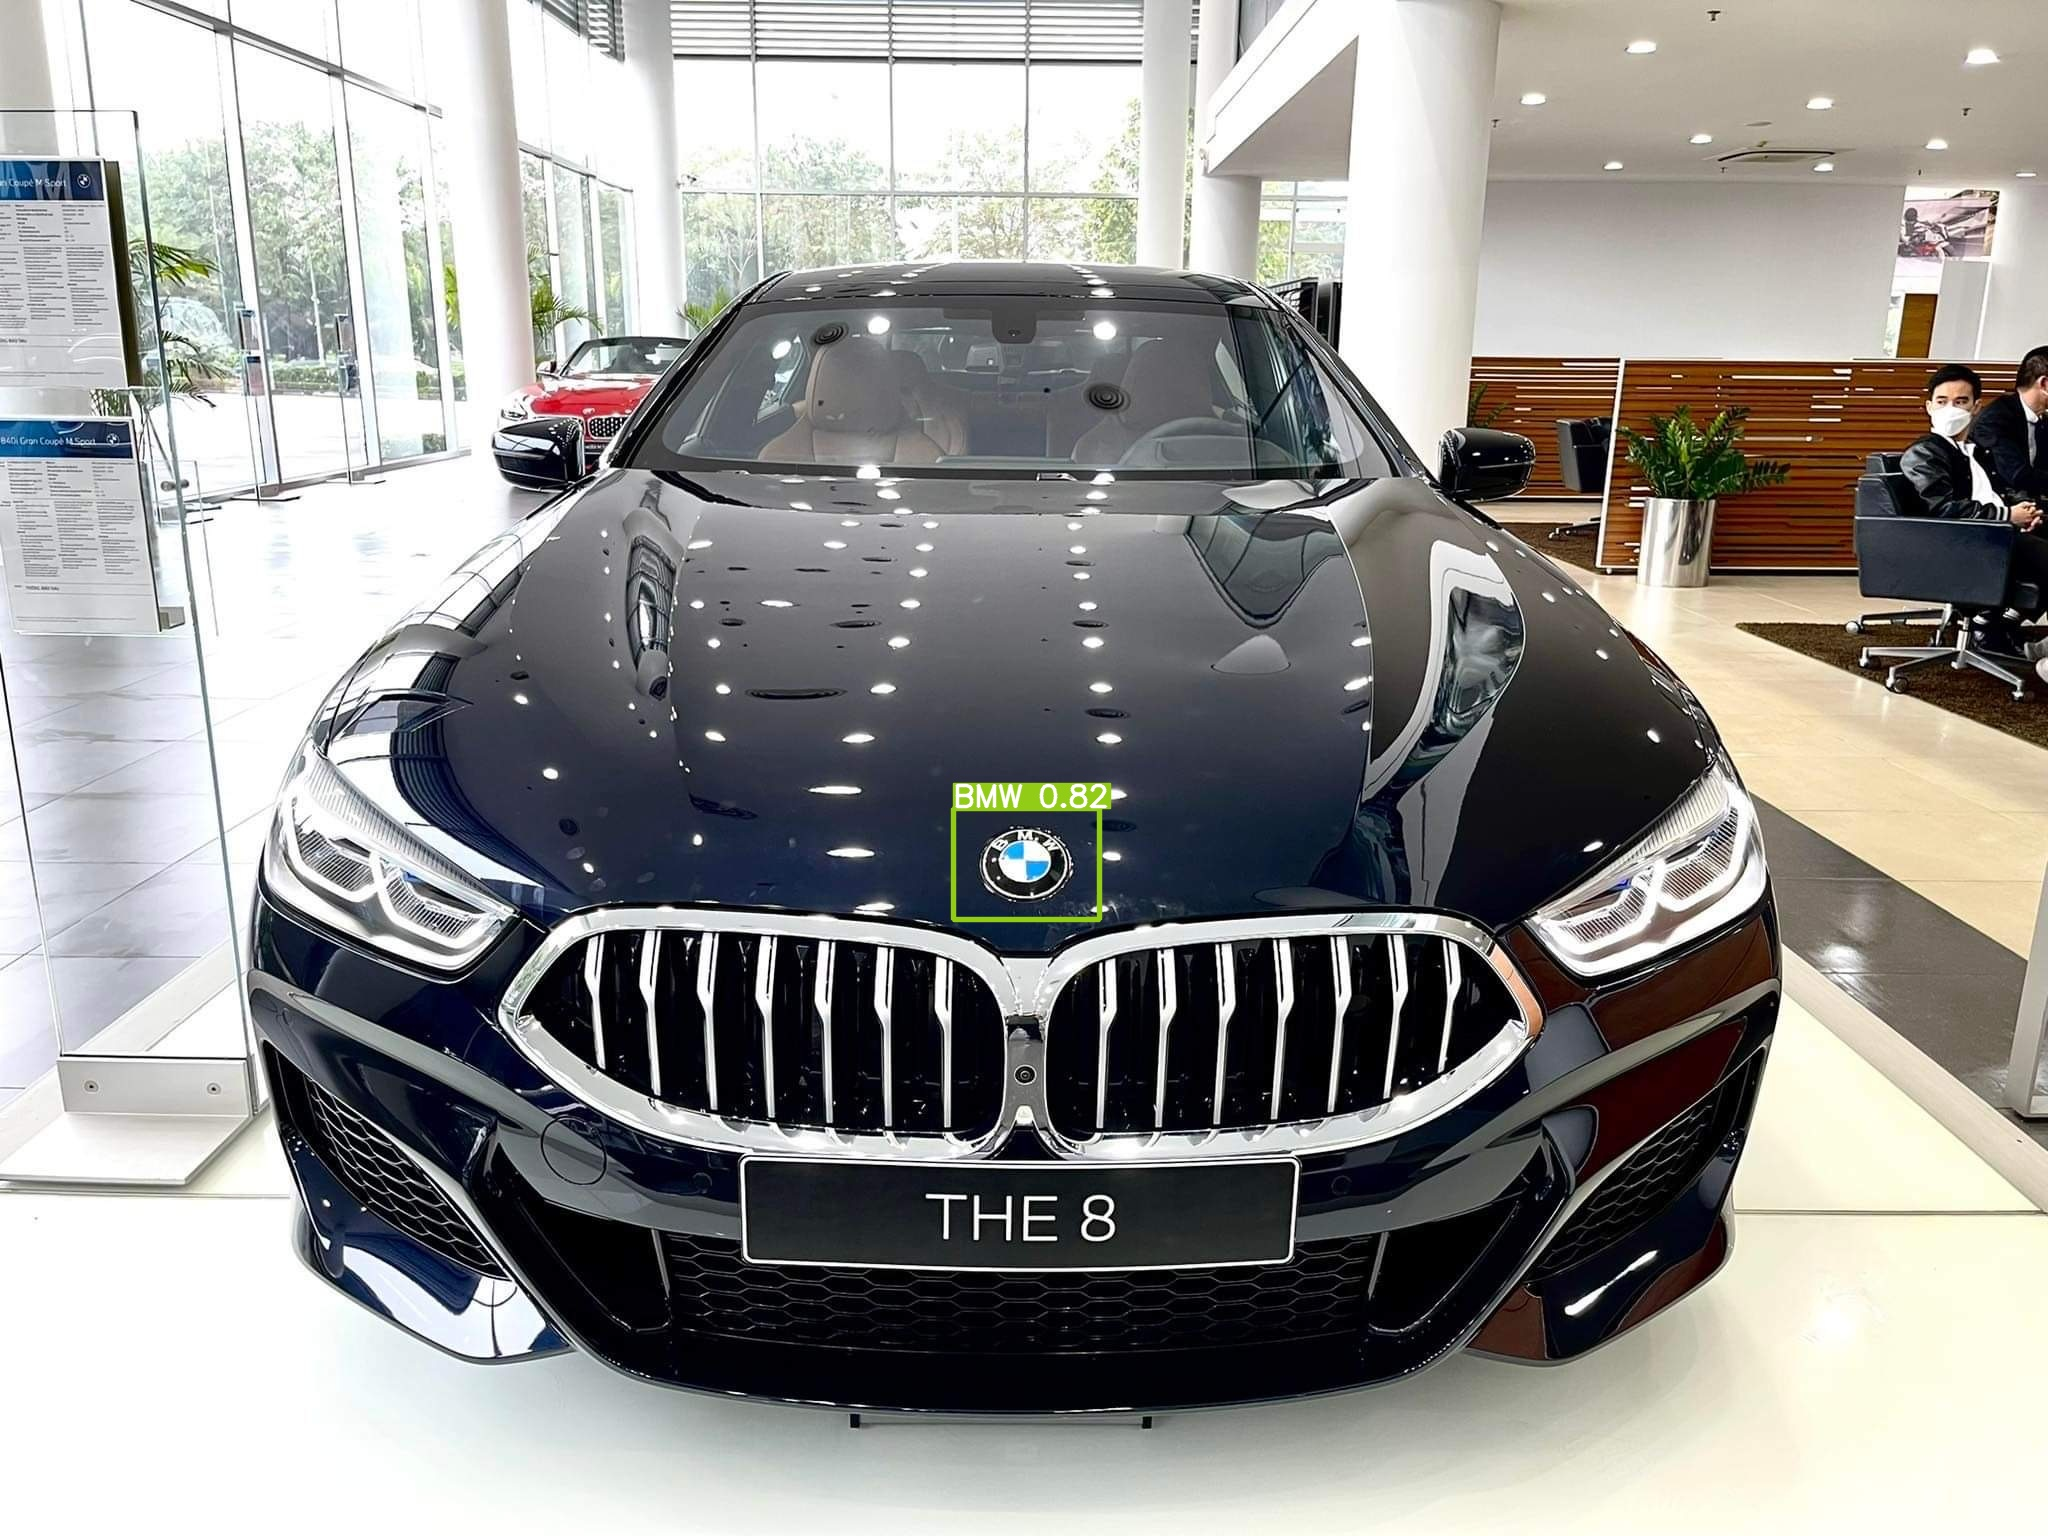

In [15]:
display.Image(filename='runs/detect/exp16/bmw-840i-2-3592.jpg', width=600)